In [1]:
import pandas as pd
import numpy as np

In [4]:
%pwd

'/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/src/analysis/round5'

In [5]:
%cd ../../../data/round5/

/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/data/round5


In [18]:
df1 = pd.read_csv('raw/prices.csv')
df2 = pd.read_csv('raw/trades.csv')

In [ ]:
df1 = df1[df1['product'] == ]

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Caesar,Paris,CROISSANTS,SEASHELLS,4265.0,8
1,100,Charlie,Paris,RAINFOREST_RESIN,SEASHELLS,9999.0,1
2,200,Paris,Caesar,CROISSANTS,SEASHELLS,4266.0,8
3,200,Paris,Caesar,JAMS,SEASHELLS,6520.0,7
4,200,Paris,Charlie,KELP,SEASHELLS,2046.0,1
...,...,...,...,...,...,...,...
53472,2999600,Caesar,Pablo,VOLCANIC_ROCK,SEASHELLS,10104.0,2
53473,2999700,Charlie,Paris,KELP,SEASHELLS,2011.0,1
53474,2999700,Charlie,Paris,SQUID_INK,SEASHELLS,1899.0,1
53475,2999700,Peter,Caesar,VOLCANIC_ROCK,SEASHELLS,10107.0,10


In [20]:
df1 = df1[df1['product'] == "MAGNIFICENT_MACARONS"]
df2 = df2[df2['symbol'] == "MAGNIFICENT_MACARONS"]

In [33]:
buyers = list(df2['buyer'].unique())
seller = list(df2['seller'].unique())
#取出trader(买家+卖家的unique)
traders = list(np.union1d(buyers, seller))
print(f"Buyers: {buyers}, Seller: {seller}")

buyers_amount = df2.groupby('buyer')['quantity'].sum()
sellers_amount = df2.groupby('seller')['quantity'].sum()
print(f"Buyers amount: {buyers_amount}, Sellers amount: {sellers_amount}")

Buyers: ['Caesar', 'Paris', 'Camilla', 'Charlie'], Seller: ['Paris', 'Charlie', 'Camilla', 'Caesar']
Buyers amount: buyer
Caesar     1992
Camilla     891
Charlie      58
Paris      2047
Name: quantity, dtype: int64, Sellers amount: seller
Caesar      101
Camilla     870
Charlie    1912
Paris      2105
Name: quantity, dtype: int64


In [46]:
# 初始化持仓记录：{"person": {"symbol": net_position}}
positions = {}

# 存储每个时间点的持仓数据
history = []

# 遍历每一笔交易
for _, row in df2.iterrows():
    timestamp = row["timestamp"]
    buyer = row["buyer"]
    seller = row["seller"]
    symbol = row["symbol"]
    quantity = row["quantity"]
    
    # 初始化 buyer 和 seller 的持仓记录（如果不存在）
    if buyer not in positions:
        positions[buyer] = {}
    if seller not in positions:
        positions[seller] = {}
    if symbol not in positions[buyer]:
        positions[buyer][symbol] = 0
    if symbol not in positions[seller]:
        positions[seller][symbol] = 0
    
    # 更新持仓：
    # buyer 获得 quantity
    positions[buyer][symbol] += quantity
    # seller 减少 quantity
    positions[seller][symbol] -= quantity
    
    # 记录当前持仓状态（可以按需调整，比如每隔一定时间记录）
    history.append({
        "timestamp": timestamp,
        "person": seller,
        "symbol": symbol,
        "position": positions[seller][symbol],
    })

# 转换为 DataFrame
position_history = pd.DataFrame(history)

# 按 person + symbol + timestamp 排序
position_history = position_history.sort_values(["person", "symbol", "timestamp"])


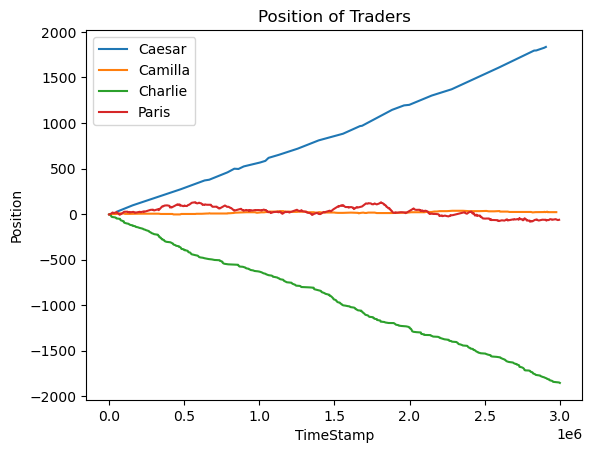

In [39]:
import matplotlib.pyplot as plt

for trader in traders:
    trader_position_history = position_history[position_history['person'] == trader]
    plt.plot(trader_position_history['timestamp'], trader_position_history['position'], label = f"{trader}")
    plt.title('Position of Traders')
    plt.xlabel('TimeStamp')
    plt.ylabel('Position')
    plt.legend()
    

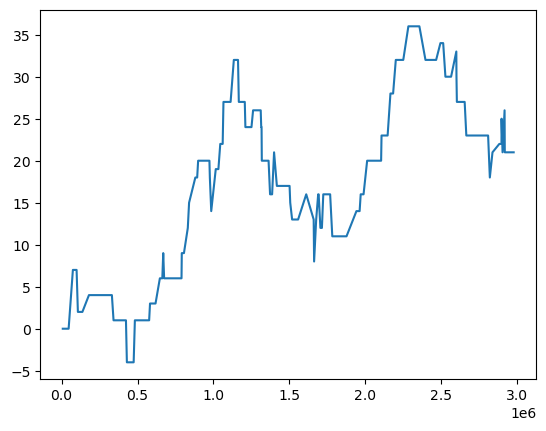

In [55]:
trader_position_history = position_history[position_history['person'] == 'Camilla']
plt.plot(trader_position_history['timestamp'], trader_position_history['position'])

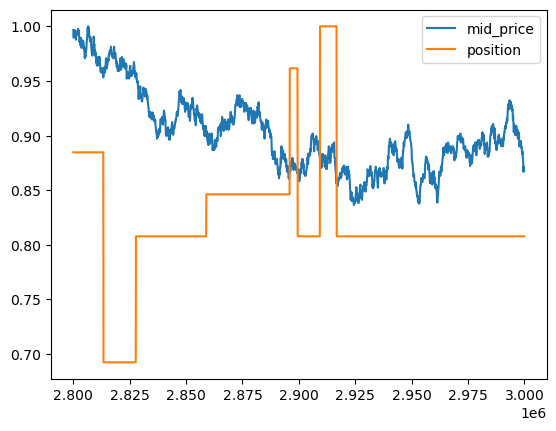

In [53]:
trader = 'Camilla'
df1 = df1.sort_values('timestamp')
trader_position_history = position_history[position_history['person'] == 'Camilla']
trader_position_history = trader_position_history.sort_values('timestamp')

# 对齐到最近的 position 记录
df_aligned = pd.merge_asof(
    df1[['timestamp', 'mid_price']],
    trader_position_history[['timestamp', 'position']],
    on='timestamp',
    direction='nearest'  # 或 'forward'（向前匹配）
)
time_length = 2000
df_aligned = df_aligned[-time_length:]  # 截取最近的 time_length 时间段
# 归一化绘图
plt.plot(df_aligned['timestamp'], df_aligned['mid_price'] / df_aligned['mid_price'].max(), label='mid_price')
plt.plot(df_aligned['timestamp'], df_aligned['position'] / df_aligned['position'].max(), label='position')
plt.legend()

In [48]:
df_aligned

,timestamp,mid_price,position
0,0,657.5,-5
1,100,661.5,-5
2,200,664.5,-5
3,300,669.5,-5
4,400,674.5,-5
...,...,...,...
29995,2999500,745.5,-1854
29996,2999600,741.5,-1854
29997,2999700,745.5,-1854
29998,2999800,744.5,-1854
